In [ ]:
# pip install tensorflow==2.13.*

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


## Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* Its a binary classification problem.
* So, we have to predict whether the customer is going to exit the bank or not.

### Divide the dataset into dependent and independent features

In [ ]:
X = data.iloc[:, 3:13]
y = data.iloc[:,13]

## Feature Engineering

In [ ]:
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

### Concateneting these variables with dataframe

In [ ]:
X = X.drop(['Geography','Gender'], axis=1)

In [ ]:
X = pd.concat([X, geography, gender], axis=1)

### Splitting the dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(7000, 11)

## Now Lets Create ANN

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
## Intializing The ANN
classifier = Sequential()

In [ ]:
## Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [ ]:
## Adding first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [ ]:
## Adding second hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [ ]:
## Adding output layer
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',
                   loss='binary_crossentropy', metrics=['accuracy'])

## Early Stopping

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history = classifier.fit(X_train,y_train,
                               validation_split=0.33, batch_size=10,
                               epochs=1000, callbacks = early_stopping)

Epoch 1/1000
469/469 [==============================] - 3s 5ms/step - loss: 0.3106 - accuracy: 0.8688 - val_loss: 0.3664 - val_accuracy: 0.8529
Epoch 2/1000
469/469 [==============================] - 3s 7ms/step - loss: 0.3101 - accuracy: 0.8684 - val_loss: 0.3691 - val_accuracy: 0.8511
Epoch 3/1000
469/469 [==============================] - 2s 5ms/step - loss: 0.3106 - accuracy: 0.8693 - val_loss: 0.3681 - val_accuracy: 0.8555
Epoch 4/1000
469/469 [==============================] - 2s 4ms/step - loss: 0.3102 - accuracy: 0.8676 - val_loss: 0.3661 - val_accuracy: 0.8550
Epoch 5/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.3094 - accuracy: 0.8712 - val_loss: 0.3729 - val_accuracy: 0.8542
Epoch 6/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.3100 - accuracy: 0.8661 - val_loss: 0.3676 - val_accuracy: 0.8550
Epoch 7/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.3087 - accuracy: 0.8676 - val_loss: 0.3671 - val_accuracy:

* At how many epochs should we stop?

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plotting History For Accuracy

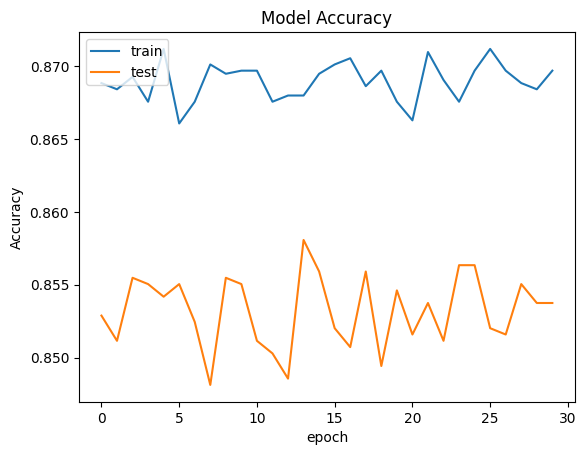

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


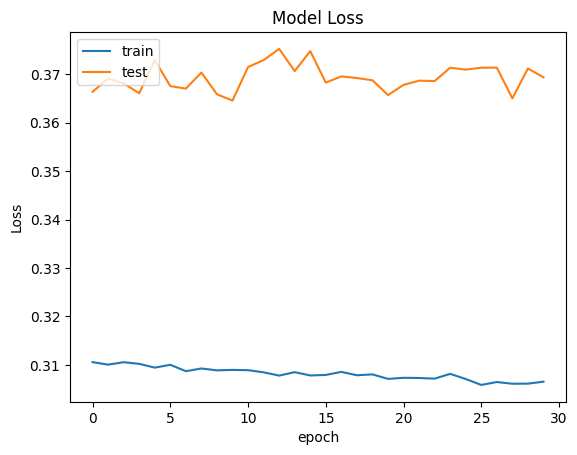

In [ ]:
## Plotting For Loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


# Part 3

## Making the Prediction and Evaluating the Model

In [ ]:
## Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

94/94 [==============================] - 0s 3ms/step


In [ ]:
## Make the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[2220,  159],
       [ 289,  332]])

In [ ]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y_test)
score

0.8506666666666667

In [ ]:
## Get the weights
classifier.get_weights()

[array([[-0.1269053 , -0.06620181, -0.05292242,  0.23419337, -0.3954426 ,
         -0.0380675 ,  0.10620043, -0.24779344,  0.34602216, -0.4972882 ,
         -0.03864156],
        [-0.44035006,  0.143008  ,  0.95199716, -0.00918011,  0.8521823 ,
         -0.67367905, -0.48776007,  0.08184011,  0.7789385 , -0.40236628,
          0.25515193],
        [ 0.08242385,  0.2421639 ,  0.0278597 ,  0.59531325, -0.14191748,
         -0.25108546,  0.375527  ,  0.04958421, -0.07894217, -0.05682672,
         -0.00565185],
        [-0.36293295, -0.25963584,  0.06086832, -0.80960584, -0.4987814 ,
         -0.33924988,  0.283215  ,  0.17147115,  0.21763296,  0.61875045,
         -0.14934912],
        [ 0.4599812 ,  0.02123431,  1.2289573 ,  0.07895895, -0.9402217 ,
          0.06431998, -0.7265847 ,  0.9520284 , -0.1948975 , -0.19134602,
          0.4261943 ],
        [-0.18984148,  0.02336257, -0.16718069,  0.29568988,  0.08061846,
         -0.44028997, -0.41588002, -0.05510015,  0.22298807,  0.2384587